In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro 

#Insert your features and labels
samples = np.load('activation_maps_lines_image52_pixel.npy')
features = np.load('activation_maps_lines_image52_labelpixel.npy')

print("The shape of samples and featuresis:\n ",samples.shape,features.shape)
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)

The shape of samples and featuresis:
  (16384, 13) (16384, 1)
(16384, 13) (16384,)


In [3]:
samples = pd.DataFrame(samples,columns=np.arange(0,13))
samples['13']=features # Adding features coulmn into the samples dataset 
samples.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB


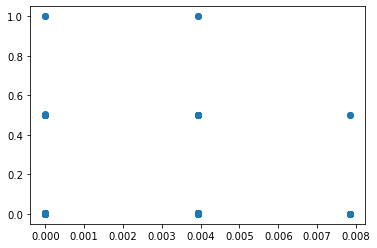

In [6]:
# Question A1
feature_1=samples[5]
feature_2=samples[6]
plt.scatter(feature_1,feature_2)

In [15]:
# Question A2
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
independent_feature=pd.DataFrame(samples[5])
dependent_feature  =pd.DataFrame(samples['13'])
# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_feature, dependent_feature, test_size=0.2, random_state=42)
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
linear_regression_predict=linear_regression.predict(X_test)

In [17]:
print("Mean Sqaured error: %.2f" % mean_squared_error(y_test,linear_regression_predict))

Mean Sqaured error: 13463.94


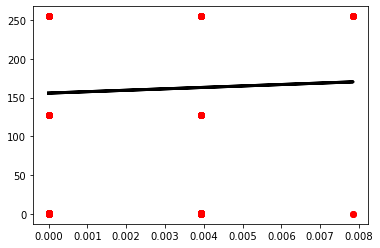

In [18]:
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,linear_regression_predict,color="black",linewidth=3)